<a href="https://colab.research.google.com/github/donleaguesss/MentalHealthPrediction_MoodSwings/blob/main/MentalHealthPredictionMoodswings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<H1>MENTAL HEALTH PREDICTION<H1>**


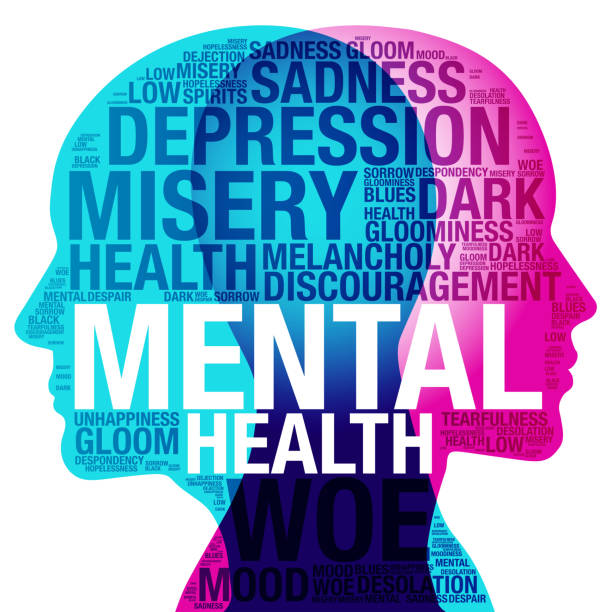

**<h1>Problem Definition</h1>**
**<h4>The Mental Health Prediction Project aims to develop a model that assesses an individual's mood stability and predicts the likelihood of experiencing mood swings, particularly among students and professionals. By evaluating various features such as occupation, stress levels, coping mechanisms, and mental health history, the model seeks to identify patterns that indicate potential mood instability. Its primary goal is to facilitate early intervention by determining if individuals are at risk of significant mood fluctuations, enabling timely mental health support to prevent further complications. Through data-driven analysis, the project will uncover correlations between stressors and mood changes, ultimately helping individuals manage their emotional well-being more effectively..</h4>**

**<h1>Why This Problem</h1>**
<h4>Mental health issues are increasingly prevalent, especially among students and professionals who face academic, career, and social pressures. These challenges often lead to stress, anxiety, and mood fluctuations, yet many individuals hesitate to seek help due to stigma or a lack of awareness. If left unaddressed, these issues can escalate into more severe conditions, such as depression or burnout.</h4>

<h4>Early identification of mental health concerns can significantly improve outcomes by providing timely support and reducing stigma. Mood swings, stress, and behavioral changes are early indicators that can be predicted through data-driven insights. This project leverages key features like occupation, stress levels, coping mechanisms, and mental health history to predict whether an individual needs mental health care.</h4>

<h4>By focusing on students and professionals, the project aims to provide early intervention, improve well-being, and prevent the escalation of mental health issues, ensuring timely support for those in need.</h4>

**<h1>Approach</h1>**
1.   Data Loading & Cleaning


*   Load the dataset and conduct preliminary data analysis to understand its structure.
*   Clean missing values by dropping rows with significant null values in key features.


2.   Data Visualization:

*   Plot bar charts for categorical variables, such as 'Country', to understand data distribution.
*   Plotting the Graphs of different Features and their Frequency
*   Generate value counts for each column to assess the prevalence of each feature value.


3. Encoding Categorical Data:


*   Apply label encoding to convert categorical values to numeric, which is necessary for model training.

4. Feature Selection:

*   Use correlation analysis and feature importance techniques to identify significant predictors of the target variable, care_options.
*  Since correlation is low across features, a scatter plot and class-wise heatmap analysis is conducted for better insight.  

5. Model Training:


*   Train multiple models (Decision Tree, Gaussian Naive Bayes, Random Forest, and K-Nearest Neighbors) using selected features.
*   Evaluate each model based on accuracy, precision, recall, and F1 score to determine the best-performing model.

6. Observation & Iteration:
*   Due to low initial accuracy (~46.49%), feature extraction is revisited
to improve model performance.
*   We have considered feature extraction from the given data and performed corelation cofactor to find which models are the best suiting features and then train the model and get more accuracy.
*   Finally take input from the user and predict whether they need care or not.


</h2>

**<h1>Data Loading and Cleaning<h1>**
**<h3>a. Mounting the Drive<h3>**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**<h3>b. Pre Install this Library to use them for data processing, analysis, modeling, and visualization.<h1>**

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 3.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib.ticker as ticker
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

from category_encoders import LeaveOneOutEncoder
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc


**<h3>c. Reading the Dataset<h1>**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML_Project/Mental Health Dataset.csv')
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


**<h3>d. Visualizing the Dataset shape.<h1>**

In [ ]:
df.shape

(292364, 17)

**<h3>e. Describing the Dataset.<h1>**

In [ ]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


**<h3>f. Display a concise summary of a DataFrame.<h1>**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

**<h3>g. Check for missing or NULL values in the DataFrame<h1>**

In [ ]:
df.isnull().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,5202
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


**I have observed that there are missing values in self_employed so we have to clean it**


**As I have more data ,I am just going to remove the feilds which have NULL values in self_employed**

In [ ]:
df = df.dropna(subset=['self_employed'])
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,8/27/2014 11:49,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,8/27/2014 11:51,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,8/27/2014 11:52,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


**I am checking the sum if there are still any missing or NULL values.**

In [ ]:
df.isnull().sum()

,0
Timestamp,0
Gender,0
Country,0
Occupation,0
self_employed,0
family_history,0
treatment,0
Days_Indoors,0
Growing_Stress,0
Changes_Habits,0


**All the missing values are cleaned now**

In [ ]:
df.shape

(287162, 17)

**<h1>Data Visualization:<h1>**
**<h3>a. Plot bar charts for categorical variables, such as 'Country', to understand data distribution.<h1>**


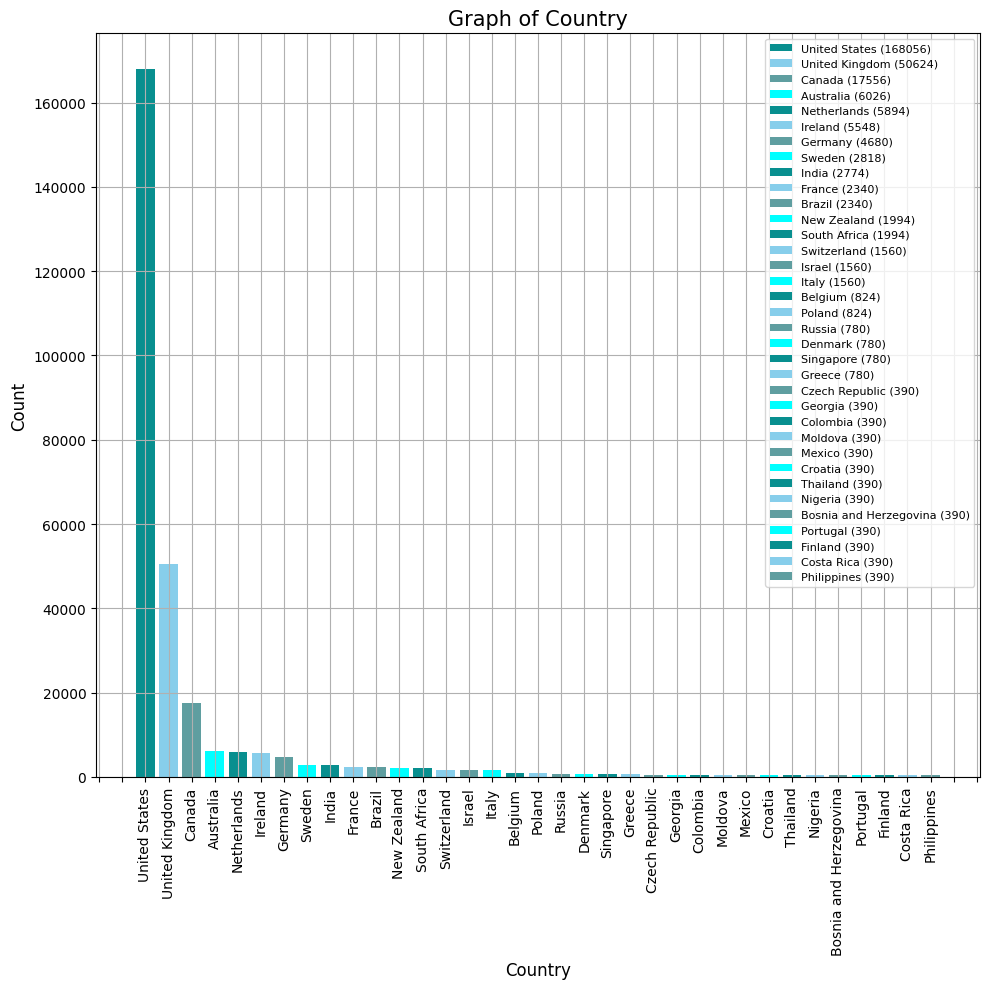

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

specific_column = 'Country'

# Define the desired colors
legend_colors = ['#088F8F','#87CEEB',  '#5F9EA0', '#00FFFF']

plt.figure(figsize=(10, 10))

value_counts = df[specific_column].value_counts()
unique_values = value_counts.index

bars = plt.bar(unique_values, value_counts.values, color=legend_colors[:len(unique_values)])
plt.title(f'Graph of {specific_column}', fontsize=15)
plt.xlabel(specific_column, fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90, ha='center')
plt.grid(True)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

legend_labels = [f'{value} ({count})' for value, count in zip(unique_values, value_counts.values)]
plt.legend(bars, legend_labels, loc='upper right', fontsize=8)

plt.tight_layout()
plt.show()


**<h3>b. Generating bar charts for each column in the DataFrame df (except the first column). It shows the distribution of values for each column as a separate plot.<h1>**

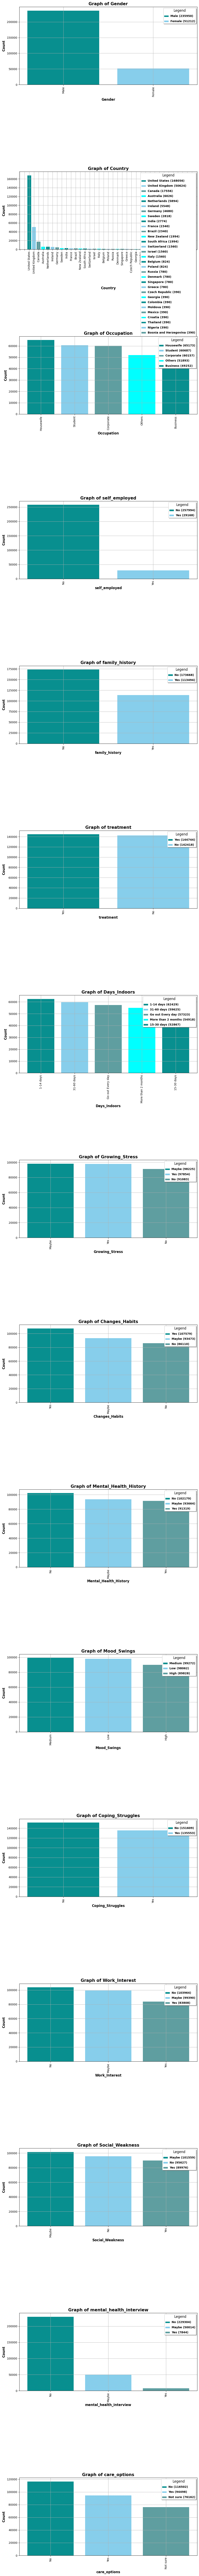

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

legend_colors = ['#088F8F', '#87CEEB', '#5F9EA0', '#00FFFF']  # Specify your desired legend colors

plt.figure(figsize=(10, 8* (len(df.columns) - 1)))

for i, column in enumerate(df.columns[1:], start=1):
    value_counts = df[column].value_counts()
    unique_values = value_counts.index

    plt.subplot(len(df.columns) - 1, 1, i)
    bars = plt.bar(unique_values, value_counts.values, color=legend_colors[:len(unique_values)])
    plt.title(f'Graph of {column}', fontsize=15, fontweight='bold')  # Bold title
    plt.xlabel(column, fontsize=12, fontweight='bold')  # Bold column name
    plt.ylabel('Count', fontsize=12, fontweight='bold')  # Bold count
    plt.xticks(rotation=90, ha='center')
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

    legend_labels = [f'{value} ({count})' for value, count in zip(unique_values, value_counts.values)]
    legend_labels_bold = [f'{value} ({count})' for value, count in zip(unique_values, value_counts.values)]
    plt.legend(bars, legend_labels, loc='upper right', fontsize=8, title='Legend', title_fontsize='12', labelspacing=1, fancybox=True, framealpha=1, shadow=True)
    plt.setp(plt.gca().get_legend().get_texts(), fontsize='10', fontweight='bold')

plt.tight_layout()
plt.show()


**<h3>c. Printing each column's name along with the frequency of each unique value within that column in the DataFrame<h1>**

In [ ]:
for column in df.columns:
    print("Column:", column)
    print(df[column].value_counts())
    print()


Column: Timestamp
Timestamp
8/27/2014 11:43    2384
8/27/2014 12:31    2340
8/27/2014 12:53    1648
8/27/2014 12:39    1604
8/27/2014 16:21    1604
                   ... 
8/27/2014 23:54     390
8/27/2014 23:30     390
8/27/2014 23:14     390
8/27/2014 23:10     390
2/1/2016 23:04      390
Name: count, Length: 574, dtype: int64

Column: Gender
Gender
Male      235950
Female     51212
Name: count, dtype: int64

Column: Country
Country
United States             168056
United Kingdom             50624
Canada                     17556
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Switzerland                 1560
Israel                      1560
Italy                       1560
Belgium                      824


**<h1>Encoding Categorical Data<h1>**
**<h3>a. Remove Timestamp and encode the code the data and save the encoded file then reload it back into the dataframe.<h1>**



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Drop the 'Timestamp' column
#df = df.drop(columns=['Timestamp'])

# Define columns to be label encoded
columns_to_encode = [
    'Gender', 'Country', 'Occupation', 'treatment', 'Mental_Health_History',
    'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
    'mental_health_interview', 'care_options', 'self_employed',
    'family_history', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mood_Swings'
]

# Apply label encoding
label_encoder = LabelEncoder()
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col].astype(str))  # Convert to string to handle potential nulls or mixed types

# Save the encoded DataFrame to a new CSV file
df.to_csv('/content/drive/MyDrive/ML_Project/encoded_Mental_Health_Dataset.csv', index=False)

# Assign the modified data back to df (this is just for confirmation; df already has the modified data)
df = pd.read_csv('/content/drive/MyDrive/ML_Project/encoded_Mental_Health_Dataset.csv')

# Display the first few rows to verify
df.head()


,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,0,28,1,0,1,1,0,2,1,2,2,0,1,2,0,2
1,0,28,1,0,1,1,0,2,1,2,2,0,1,2,1,2
2,0,18,1,0,0,1,0,2,1,2,2,0,1,2,0,1
3,0,0,1,0,1,1,0,2,1,2,2,0,1,2,1,1
4,0,28,1,0,0,0,0,2,1,2,2,0,1,2,1,0


**<h3>b. Visualize Shape of the Encoded data frame:<h1>**

In [ ]:
df.shape

(287162, 16)

**<h3>c. Description about the Encoded data frame:<h1>**

In [ ]:
df.describe()

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162,287162
unique,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,235950,168056,65173,257994,173668,144744,62429,98225,107579,102179,99272,151609,103964,101559,229304,116502


**<h3>d. Printing each column's name along with the frequency of each unique value within that column in the DataFrame<h1>**

In [ ]:
for column in df.columns:
    print("Column:", column)
    print(df[column].value_counts())
    print()


Column: Gender
Gender
Male      235950
Female     51212
Name: count, dtype: int64

Column: Country
Country
United States             168056
United Kingdom             50624
Canada                     17556
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Switzerland                 1560
Israel                      1560
Italy                       1560
Belgium                      824
Poland                       824
Russia                       780
Denmark                      780
Singapore                    780
Greece                       780
Czech Republic               390
Georgia                      390
Colombia                     390
Moldova                      390
Mexico                       390
Cr

**<h3>e. Creating individual bar plots for each column in the DataFrame df, including the first column and printing the unique values.<h1>**

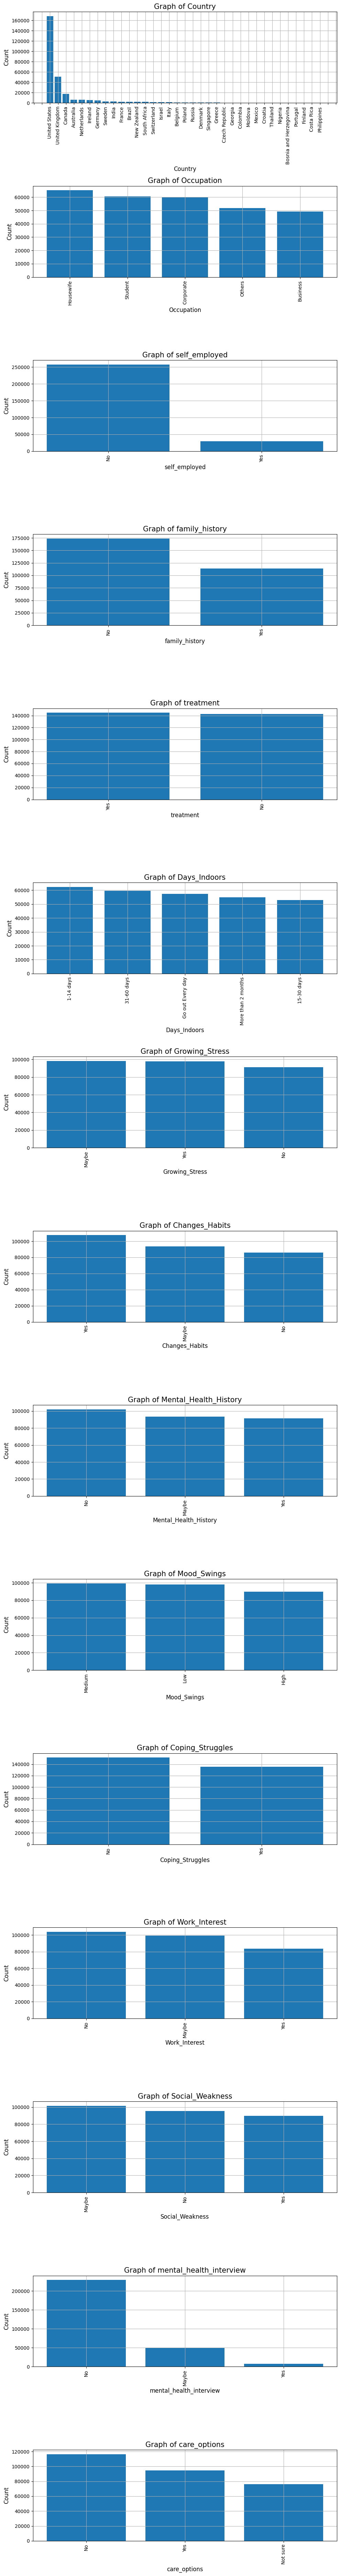

In [ ]:
plt.figure(figsize=(10, 5 * (len(df.columns) - 1)))

for i, column in enumerate(df.columns[1:], start=1):
    value_counts = df[column].value_counts()
    plt.subplot(len(df.columns) - 1, 1, i)
    plt.bar(value_counts.index, value_counts.values)
    plt.title(f'Graph of {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90, ha='center')  # Set rotation to 90 degrees and horizontal alignment to center
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))

plt.tight_layout()
plt.show()

**<h3>f. Printing the column name followed by the unique values present in that column.<h1>**

In [ ]:
for column in df:
  print(column)
  print(df[column].unique(), '\n')

Gender
['Female' 'Male'] 

Country
['United States' 'Poland' 'Australia' 'Canada' 'United Kingdom'
 'South Africa' 'Sweden' 'New Zealand' 'Netherlands' 'India' 'Belgium'
 'Ireland' 'France' 'Portugal' 'Brazil' 'Costa Rica' 'Russia' 'Germany'
 'Switzerland' 'Finland' 'Israel' 'Italy' 'Bosnia and Herzegovina'
 'Singapore' 'Nigeria' 'Croatia' 'Thailand' 'Denmark' 'Mexico' 'Greece'
 'Moldova' 'Colombia' 'Georgia' 'Czech Republic' 'Philippines'] 

Occupation
['Corporate' 'Student' 'Business' 'Housewife' 'Others'] 

self_employed
['No' 'Yes'] 

family_history
['Yes' 'No'] 

treatment
['Yes' 'No'] 

Days_Indoors
['1-14 days' 'Go out Every day' 'More than 2 months' '15-30 days'
 '31-60 days'] 

Growing_Stress
['Yes' 'No' 'Maybe'] 

Changes_Habits
['No' 'Yes' 'Maybe'] 

Mental_Health_History
['Yes' 'No' 'Maybe'] 

Mood_Swings
['Medium' 'Low' 'High'] 

Coping_Struggles
['No' 'Yes'] 

Work_Interest
['No' 'Maybe' 'Yes'] 

Social_Weakness
['Yes' 'No' 'Maybe'] 

mental_health_interview
['Maybe' 'No'

**<h1>Training the Decision Tree, GuassianNB, RandomForest ,KNN models with target variable as Mood Swings and with the rest of the features**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Define Features and Target
Features = ['Gender','Country','Occupation' ,'self_employed', 'family_history', 'treatment',
            'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
            'Mental_Health_History','care_options', 'Coping_Struggles',
            'Work_Interest', 'Social_Weakness','mental_health_interview']
Target = 'Mood_Swings'

# Placeholder for model metrics
model_metrics = []

# Define a function to evaluate models
def evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name):
    model.fit(X_train, Y_train)
    result = model.predict(X_test)

    # Calculate metrics
    ac_sc = accuracy_score(Y_test, result)
    rc_sc = recall_score(Y_test, result, average="weighted")
    pr_sc = precision_score(Y_test, result, average="weighted")
    f1_sc = f1_score(Y_test, result, average='micro')
    confusion_m = confusion_matrix(Y_test, result)

    # Append metrics and model with predictions to list
    model_metrics.append((model_name, ac_sc, rc_sc, pr_sc, f1_sc, model, result))

    # Print model performance
    print(f"========== {model_name} ==========")
    print("Accuracy    : ", ac_sc)
    print("Recall      : ", rc_sc)
    print("Precision   : ", pr_sc)
    print("F1 Score    : ", f1_sc)
    print("Confusion Matrix: ")
    print(confusion_m)
    print("\n")

# Load your data
# Assuming 'df' is your dataframe and 'Features' and 'Target' are the columns you're using
df = pd.read_csv("/content/drive/MyDrive/ML_Project/encoded_Mental_Health_Dataset.csv")  # Replace with your actual dataset path
X_train, X_test, Y_train, Y_test = train_test_split(df[Features], df[Target], test_size=0.2, random_state=42)

# Models to evaluate
models = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (GaussianNB(), "Gaussian Naive Bayes"),
    (RandomForestClassifier(), "Random Forest Classifier"),
    (KNeighborsClassifier(n_neighbors=1000), "KNN")
]

# Evaluate each model
for model, model_name in models:
    evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name)

# Determine the best model based on accuracy
best_model = max(model_metrics, key=lambda x: x[1])  # Select based on accuracy score

# Print the best model metrics
print("========== Best Model ==========")
print(f"Best Model: {best_model[0]}")
print("Accuracy    : ", best_model[1])
print("Recall      : ", best_model[2])
print("Precision   : ", best_model[3])
print("F1 Score    : ", best_model[4])

========== Decision Tree ==========
Accuracy    :  0.9709922866644612
Recall      :  0.9709922866644612
Precision   :  0.9709972605715436
F1 Score    :  0.9709922866644612
Confusion Matrix: 
[[17255    88   473]
 [  116 19397   192]
 [  564   233 19115]]


========== Gaussian Naive Bayes ==========
Accuracy    :  0.42508662267337594
Recall      :  0.42508662267337594
Precision   :  0.42660792096807537
F1 Score    :  0.42508662267337594
Confusion Matrix: 
[[6721 4724 6371]
 [4453 7713 7539]
 [3782 6150 9980]]


========== Random Forest Classifier ==========
Accuracy    :  0.9710096982570996
Recall      :  0.9710096982570996
Precision   :  0.9710348538353649
F1 Score    :  0.9710096982570996
Confusion Matrix: 
[[17173   100   543]
 [  104 19366   235]
 [  494   189 19229]]


========== KNN ==========
Accuracy    :  0.6545888252398447
Recall      :  0.6545888252398447
Precision   :  0.6562712171861794
F1 Score    :  0.6545888252398447
Confusion Matrix: 
[[10185  3506  4125]
 [ 2430 13362 

**<h1>MY OBSERVATIONS</h1>**
<h3>Without feature extraction, By just training the Models ,the Highest Accuracy I am getting is 97.10%.</h3>

**<h1>Feature Selection</h1>**
**<h2>Using Corelation Cofactor Heatmap</h2>**
**<h4>We have to select the features strongly correlated with the target variable care_options to improve prediction. It starts by separating the target and features, then calculates and visualizes the correlation matrix to understand relationships between variables. By taking the absolute values of correlations with care_options and filtering those above a threshold (0.01), it identifies and outputs features that are potentially useful for predicting care_options.</h4>**

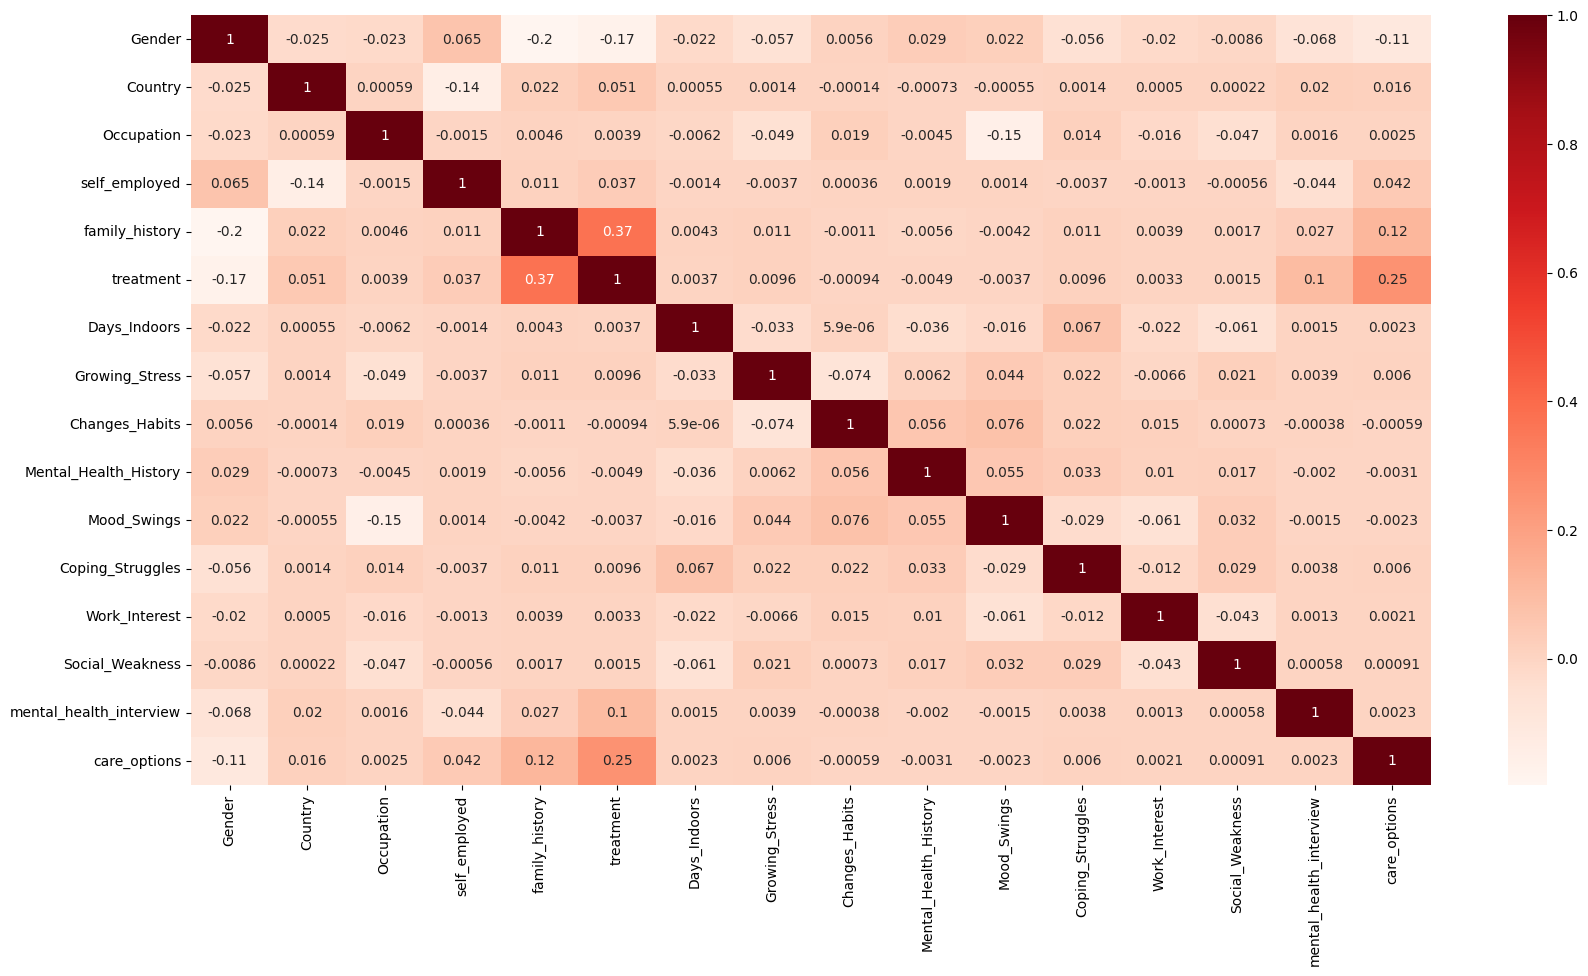

In [ ]:
# Set target and features
X_fs = df.drop(['Mood_Swings'], axis=1)  # Drop the new target column
Y_fs = df['Mood_Swings']  # Set the target variable

# Visualize correlations with the updated target
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [ ]:
 # Calculate the absolute correlations with the new target variable
cor_target = abs(cor['Mood_Swings'])

# Selecting features highly correlated with 'care_options'
relevant_features = cor_target[cor_target > 0.01]
print(relevant_features)


Gender                   0.021544
Occupation               0.150083
Days_Indoors             0.016356
Growing_Stress           0.043551
Changes_Habits           0.076288
Mental_Health_History    0.055211
Mood_Swings              1.000000
Coping_Struggles         0.029216
Work_Interest            0.060625
Social_Weakness          0.032312
Name: Mood_Swings, dtype: float64


**<h3>After the heatmap we have selected the best features based on Mutual Information now We are training the  Decision Tree, GuassianNB, RandomForest ,KNN models with target variable as care_options and with the rest of the selected features</h1>**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define Features and Target
Features = ['Gender','Occupation','Days_Indoors', 'Growing_Stress', 'Changes_Habits',
            'Mental_Health_History', 'Coping_Struggles','Work_Interest', 'Social_Weakness']
print('Full Features: ', Features)
Target = 'Mood_Swings'
print('Target: ', Target)

# Placeholder for model metrics
model_metrics = []

# Define a function to evaluate models
def evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name):
    model.fit(X_train, Y_train)
    result = model.predict(X_test)

    ac_sc = accuracy_score(Y_test, result)
    rc_sc = recall_score(Y_test, result, average="weighted")
    pr_sc = precision_score(Y_test, result, average="weighted")
    f1_sc = f1_score(Y_test, result, average='micro')
    confusion_m = confusion_matrix(Y_test, result)

    # Append metrics to list
    model_metrics.append((model_name, ac_sc, rc_sc, pr_sc, f1_sc))

    print(f"========== {model_name} ==========")
    print("Accuracy    : ", ac_sc)
    print("Recall      : ", rc_sc)
    print("Precision   : ", pr_sc)
    print("F1 Score    : ", f1_sc)
    print("Confusion Matrix: ")
    print(confusion_m)
    print("\n")

# Load your data
# Assuming 'df' is your dataframe and 'Features' and 'Target' are the columns you're using
X_train, X_test, Y_train, Y_test = train_test_split(df[Features], df[Target], test_size=0.2, random_state=42)

# Models to evaluate
models = [
    (DecisionTreeClassifier(), "Decision Tree"),
    (GaussianNB(), "Gaussian Naive Bayes"),
    (RandomForestClassifier(), "Random Forest Classifier"),
    (KNeighborsClassifier(n_neighbors=1000), "KNN")
]

# Evaluate each model
for model, model_name in models:
    evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name)

# Determine and print the best model based on accuracy
best_model = max(model_metrics, key=lambda x: x[1])  # Based on accuracy score
print("========== Best Model ==========")
print(f"Best Model: {best_model[0]}")
print("Accuracy    : ", best_model[1])
print("Recall      : ", best_model[2])
print("Precision   : ", best_model[3])
print("F1 Score    : ", best_model[4])


Full Features:  ['Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']
Target:  Mood_Swings
========== Decision Tree ==========
Accuracy    :  0.9786011526474326
Recall      :  0.9786011526474326
Precision   :  0.9786782377366493
F1 Score    :  0.9786011526474326
Confusion Matrix: 
[[17254     0   562]
 [  143 19444   118]
 [  222   184 19506]]


========== Gaussian Naive Bayes ==========
Accuracy    :  0.43166820469068307
Recall      :  0.43166820469068307
Precision   :  0.43422769629390445
F1 Score    :  0.43166820469068307
Confusion Matrix: 
[[ 6868  4639  6309]
 [ 4190  7835  7680]
 [ 3677  6146 10089]]


========== Random Forest Classifier ==========
Accuracy    :  0.9786011526474326
Recall      :  0.9786011526474326
Precision   :  0.9786782377366493
F1 Score    :  0.9786011526474326
Confusion Matrix: 
[[17254     0   562]
 [  143 19444   118]
 [  222   184 19506]]


========== K

**<h3>b. To Get better results I am reducing my Features using LDA mainly to handle the categorical data and after reducing the dimension it trains the  Decision Tree, GuassianNB, RandomForest ,KNN models with target variable as care_options and with the rest of the selected features</h1>**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Assume 'df' is your DataFrame with the features and target column
# Define features and target variable
X = df.drop(['Mood_Swings'], axis=1)  # Exclude target column from features
y = df['Mood_Swings']  # Define the target variable

# Convert all columns to numeric, handling non-numeric values
X = X.apply(pd.to_numeric, errors='coerce')
X.fillna(X.mean(), inplace=True)  # Fill any missing values with column means

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Check the number of classes and determine the maximum number of components for LDA
num_classes = len(y_train.unique())
num_features = X_train.shape[1]
max_components = min(num_classes - 1, num_features)  # LDA's `n_components` limit

# Define parameter grid for GridSearchCV with the maximum number of components
param_grid = {'n_components': list(range(1, max_components + 1))}

# Step 2: Set up GridSearchCV to find the optimal number of components
lda = LDA()
grid_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5, scoring='accuracy', error_score='raise')
grid_search.fit(X_train, y_train)

# Retrieve the best LDA model and number of components
best_lda = grid_search.best_estimator_
best_n_components = grid_search.best_params_['n_components']

# Step 3: Transform the training and test data using the optimized LDA model
X_train_lda = best_lda.transform(X_train)
X_test_lda = best_lda.transform(X_test)

# Define classifiers to train and evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


# Step 4: Train, evaluate each classifier, and store metrics
model_metrics = []

for model_name, model in classifiers.items():
    # Train the model
    model.fit(X_train_lda, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_lda)

    # Calculate evaluation metrics
    ac_sc = accuracy_score(y_test, y_pred)
    rc_sc = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    pr_sc = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    f1_sc = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Append metrics to the model_metrics list
    model_metrics.append((model_name, ac_sc, rc_sc, pr_sc, f1_sc))

    # Display evaluation metrics for each model
    print(f"\n========== {model_name} ==========")
    print(f"Accuracy    : {ac_sc:.4f}")
    print(f"Recall      : {rc_sc:.4f}")
    print(f"Precision   : {pr_sc:.4f}")
    print(f"F1 Score    : {f1_sc:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
    print("=" * 50)

# Identify the best model based on accuracy score
best_model = max(model_metrics, key=lambda x: x[1])  # Based on accuracy score

# Display best model's metrics
print("\n========== Best Model ==========")
print(f"Best Model: {best_model[0]}")
print("Accuracy    : ", best_model[1])
print("Recall      : ", best_model[2])
print("Precision   : ", best_model[3])
print("F1 Score    : ", best_model[4])



========== Logistic Regression ==========
Accuracy    : 0.4054
Recall      : 0.4054
Precision   : 0.4006
F1 Score    : 0.3924
Confusion Matrix:
 [[ 6574  4088  7154]
 [ 4995  4753  9957]
 [ 3158  4799 11955]]

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.37      0.40     17816
           1       0.35      0.24      0.29     19705
           2       0.41      0.60      0.49     19912

    accuracy                           0.41     57433
   macro avg       0.40      0.40      0.39     57433
weighted avg       0.40      0.41      0.39     57433


========== Decision Tree ==========
Accuracy    : 0.8503
Recall      : 0.8503
Precision   : 0.8504
F1 Score    : 0.8503
Confusion Matrix:
 [[15081  1239  1496]
 [ 1317 16993  1395]
 [ 1674  1476 16762]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84     17816
           1       0.86      0.86      0.86   

**<h1>Conclusion<h1>**
**<h3>Finally after three methods I have found that Random Forest  with
Heatmap analysis features have the best Accuracy of 97.86%.**

**<h3>Now I am Training the entire Dataset with Random forest to build the actual model and predict output for the data that I have collected using Google forms.**

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Define Features and Target for training
Features = ['Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
            'Mental_Health_History', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']
print('Training Features: ', Features)
Target = 'Mood_Swings'
print('Target: ', Target)

# Load your data (assuming 'df' is already your DataFrame with encoded values)
# Train the Random Forest model on the selected features
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(df[Features], df[Target])

# Function to predict if the user has mood swings based on input
def predict_Mood_Swings():
    print("\nPlease provide the following details for the prediction:")

    # Collecting all inputs from the user
    user_data = {
        'Gender': input("Gender (1 for Male, 0 for Female): "),
        'Country': input("Country (e.g., 0 for USA, 1 for India, etc.): "),
        'Occupation': input("Occupation (e.g., 0 for Student, 1 for Employed, etc.): "),
        'self_employed': input("Self Employed (1 for Yes, 0 for No): "),
        'family_history': input("Family History (1 for Yes, 0 for No): "),
        'treatment': input("Treatment (1 for Yes, 0 for No): "),
        'Days_Indoors': input("Days Indoors (average days per week): "),
        'Growing_Stress': input("Growing Stress (1 for Yes, 0 for No): "),
        'Changes_Habits': input("Changes in Habits (1 for Yes, 0 for No): "),
        'Mental_Health_History': input("Mental Health History (1 for Yes, 0 for No): "),
        'Coping_Struggles': input("Coping Struggles (1 for Yes, 0 for No): "),
        'Work_Interest': input("Work Interest (1 for Yes, 0 for No): "),
        'Social_Weakness': input("Social Weakness (1 for Yes, 0 for No): "),
        'mental_health_interview': input("Mental Health Interview (1 for Yes, 0 for No): "),
        'care_options': input("care_options (1 for Yes, 0 for No): ")
    }

    # Convert input to a DataFrame
    user_input = pd.DataFrame([[
        int(user_data['Gender']), int(user_data['Occupation']), int(user_data['Days_Indoors']),
        int(user_data['Growing_Stress']), int(user_data['Changes_Habits']),
        int(user_data['Mental_Health_History']), int(user_data['Coping_Struggles']),
        int(user_data['Work_Interest']), int(user_data['Social_Weakness'])
    ]], columns=Features)

    # Make prediction using the trained model
    prediction = random_forest_model.predict(user_input)

    # Print the prediction result
    if prediction[0] == 1:
        print("\nThe model predicts that you have Mood Swings.")
    else:
        print("\nThe model predicts that you do not have Mood Swings.")

# Ask the user for input and predict
predict_Mood_Swings()


Training Features:  ['Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']
Target:  Mood_Swings

Please provide the following details for the prediction:
Gender (1 for Male, 0 for Female): 1
Country (e.g., 0 for USA, 1 for India, etc.): 1
Occupation (e.g., 0 for Student, 1 for Employed, etc.): 0
Self Employed (1 for Yes, 0 for No): 0
Family History (1 for Yes, 0 for No): 0
Treatment (1 for Yes, 0 for No): 0
Days Indoors (average days per week): 5
Growing Stress (1 for Yes, 0 for No): 1
Changes in Habits (1 for Yes, 0 for No): 1
Mental Health History (1 for Yes, 0 for No): 1
Coping Struggles (1 for Yes, 0 for No): 0
Work Interest (1 for Yes, 0 for No): 0
Social Weakness (1 for Yes, 0 for No): 0
Mental Health Interview (1 for Yes, 0 for No): 0
care_options (1 for Yes, 0 for No): 0

The model predicts that you do not have Mood Swings.
